To run this code: 
1. Move the complete dataset's csv file into the folder called data (at the root location of the project)
2. Create a sample of the data by running the file sampleCreation.py located at the root of the project

Necessary imports

In [174]:
import pandas as pd
import numpy as np
import time 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

We read the file and delete unnecesary fields

In [175]:
CSV_PATH = 'data/sample.csv'
data_df = pd.read_csv(CSV_PATH)
data_df

,vendorid,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Improvement_surcharge,Total_amount,Payment_type,Trip_type
0,1,11/26/2015 10:16:57 PM,11/26/2015 10:35:49 PM,N,1,-73.913757,40.824203,-73.890121,40.868320,1,...,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0
1,2,02/22/2015 08:38:31 PM,02/22/2015 09:08:07 PM,N,1,-73.927872,40.863174,-73.956902,40.712116,1,...,39.5,0.5,0.5,10.20,0.0,NaN,0.3,51.00,1,1.0
2,1,03/09/2015 11:15:51 PM,03/09/2015 11:21:30 PM,N,1,-73.911713,40.775452,-73.925270,40.770466,2,...,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1.0
3,2,08/31/2015 10:22:54 PM,08/31/2015 10:34:52 PM,N,1,-73.856834,40.736576,-73.844826,40.723438,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,03/15/2015 12:24:38 AM,03/15/2015 12:38:28 AM,N,1,-73.926292,40.762394,-73.947899,40.778809,1,...,14.0,0.5,0.5,3.82,0.0,NaN,0.3,19.12,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,07/04/2015 01:44:43 AM,07/04/2015 02:02:22 AM,N,1,-73.961090,40.716705,-73.838158,40.721008,1,...,25.0,0.5,0.5,5.26,0.0,NaN,0.3,31.56,1,1.0
99996,1,01/14/2015 01:56:14 PM,01/14/2015 02:07:16 PM,N,1,-73.939720,40.804951,-73.948517,40.782211,1,...,9.5,0.0,0.5,2.05,0.0,NaN,0.3,12.35,1,1.0
99997,1,02/05/2015 08:30:37 PM,02/05/2015 08:34:30 PM,N,1,-73.949509,40.801895,-73.939095,40.799133,1,...,5.0,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0
99998,2,01/26/2015 01:10:44 PM,01/26/2015 01:19:23 PM,N,1,-73.950539,40.810986,-73.940109,40.806442,1,...,7.5,0.0,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0


We drop columns that we don't want

In [176]:
data_df = data_df.drop(labels=['vendorid','Ehail_fee', 'MTA_tax', 'Improvement_surcharge', 
                               'Extra','Total_amount', 'Tolls_amount', 'Store_and_fwd_flag'],
                       axis=1)

We exclude instances that don't make sense

In [177]:
data_df = data_df.loc[data_df.Trip_type.notna()] # exclude where trip_type is null
data_df = data_df.loc[data_df.Passenger_count >= 0] # exclude where passangers is less than 1
data_df = data_df.loc[data_df.Fare_amount > 0] # Fare_amount has to be higher than zero
data_df = data_df.loc[data_df.Pickup_longitude != 0] # Coordinates shouldn't be zero in this dataset       
data_df = data_df.loc[data_df.Pickup_latitude != 0] # Coordinates shouldn't be zero in this dataset 
data_df = data_df.loc[data_df.Dropoff_longitude != 0] # Coordinates shouldn't be zero in this dataset 
data_df = data_df.loc[data_df.Dropoff_longitude != 0] # Coordinates shouldn't be zero in this dataset 
data_df = data_df.loc[data_df.rate_code != 99] # Delete instance that have a 99 as rate_code 

We convert the dates to ordinal data

In [178]:
data_df['pickup_datetime'] = pd.to_datetime(data_df['pickup_datetime'])
data_df['pickup_datetime']=data_df['pickup_datetime'].apply(lambda x: time.mktime(x.timetuple()))
data_df['dropoff_datetime'] = pd.to_datetime(data_df['dropoff_datetime'])
data_df['dropoff_datetime']=data_df['dropoff_datetime'].apply(lambda x: time.mktime(x.timetuple()))

We convert nominal columns to binary

In [179]:
# data_df = pd.concat([data_df,pd.get_dummies(data_df['Store_and_fwd_flag'], prefix='Store_and_fwd_flag')],axis=1) 
data_df = pd.concat([data_df,pd.get_dummies(data_df['rate_code'], prefix='rate_code')],axis=1) 
data_df = pd.concat([data_df,pd.get_dummies(data_df['Payment_type'], prefix='Payment_type')],axis=1) 
data_df = pd.concat([data_df,pd.get_dummies(data_df['Trip_type'], prefix='Trip_type')],axis=1) 
data_df = data_df.drop(['rate_code','Payment_type','Trip_type'], axis=1)

In [180]:
data_df

,pickup_datetime,dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Tip_amount,...,rate_code_4,rate_code_5,rate_code_6,Payment_type_1,Payment_type_2,Payment_type_3,Payment_type_4,Payment_type_5,Trip_type_1.0,Trip_type_2.0
0,1.448594e+09,1.448595e+09,-73.913757,40.824203,-73.890121,40.868320,1,3.50,15.0,0.00,...,0,0,0,0,1,0,0,0,1,0
1,1.424656e+09,1.424657e+09,-73.927872,40.863174,-73.956902,40.712116,1,14.04,39.5,10.20,...,0,0,0,1,0,0,0,0,1,0
2,1.425957e+09,1.425958e+09,-73.911713,40.775452,-73.925270,40.770466,2,1.10,6.0,0.00,...,0,0,0,0,1,0,0,0,1,0
3,1.441074e+09,1.441075e+09,-73.856834,40.736576,-73.844826,40.723438,1,2.21,10.5,0.00,...,0,0,0,0,1,0,0,0,1,0
4,1.426393e+09,1.426394e+09,-73.926292,40.762394,-73.947899,40.778809,1,4.12,14.0,3.82,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.435989e+09,1.435990e+09,-73.961090,40.716705,-73.838158,40.721008,1,8.45,25.0,5.26,...,0,0,0,1,0,0,0,0,1,0
99996,1.421262e+09,1.421262e+09,-73.939720,40.804951,-73.948517,40.782211,1,2.00,9.5,2.05,...,0,0,0,1,0,0,0,0,1,0
99997,1.423186e+09,1.423186e+09,-73.949509,40.801895,-73.939095,40.799133,1,0.60,5.0,1.25,...,0,0,0,1,0,0,0,0,1,0
99998,1.422296e+09,1.422296e+09,-73.950539,40.810986,-73.940109,40.806442,1,1.37,7.5,0.00,...,0,0,0,0,1,0,0,0,1,0


We separate our dataframe into our X and y variables

In [181]:
X = data_df.drop('Fare_amount', axis=1)
y = data_df.Fare_amount

We split our data into training and testing data

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

Create and fit the linear regression

In [183]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('intercept: ', regressor.intercept_)
print('coefficients: ', regressor.coef_)
print('slope:' )

intercept:  135.12424654684736
coefficients:  [-4.83381513e-05  4.83418471e-05  1.19854147e+01 -1.33105536e+01
 -1.33306046e+01  8.04832717e+00  3.61277104e-02  2.74985109e+00
  1.27490656e-01 -8.99042575e+00  1.21268753e+01  4.45792832e+00
  7.81021683e+00  2.20981700e+00 -1.76144116e+01 -1.28133266e+01
 -1.30122512e+01 -1.36532395e+01 -1.18177744e+01  5.12965918e+01
  4.34127426e-01 -4.34127426e-01]


Calculate predictions for the linear regression model with our testing data and compare the results

In [184]:
y_pred = regressor.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_df

,Actual,Predicted
67856,26.0,19.537802
43881,6.5,7.487416
77988,22.0,22.065809
26819,3.5,4.995360
64911,16.0,15.584014
...,...,...
11376,8.0,16.308568
49339,7.0,7.556390
80322,7.0,6.748784
98111,3.0,3.786940


In [185]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.75
Mean squared error: 17.90
Root mean squared error: 4.23


Text(0.5, 1.0, 'Results comparison if we include total amount')

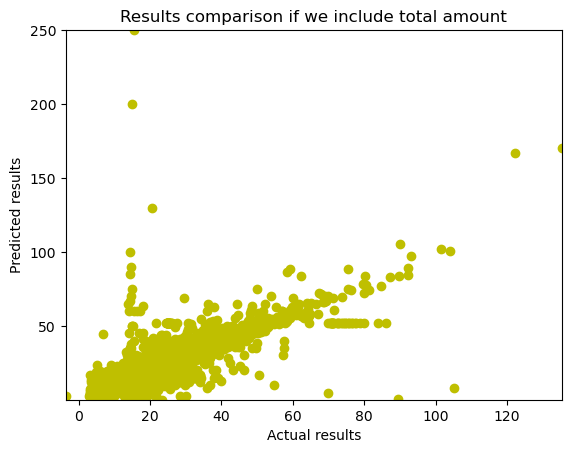

In [186]:
coef = regressor.coef_
poly1d_fn = np.poly1d(coef)
x = comparison_df['Predicted']
y = comparison_df['Actual']
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.xlabel("Actual results")
plt.ylabel("Predicted results")
plt.title("Results comparison if we include total amount")